<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/Logistic_Regression_pada_Binary_Classification_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression pada Binary Classification Task


Logistic Regression adalah algoritma yang sering digunakan untuk tugas klasifikasi biner, di mana tujuannya adalah untuk memprediksi salah satu dari dua kelas yang mungkin. Algoritma ini menghasilkan model yang menghubungkan input fitur dengan kemungkinan dari dua kelas output menggunakan fungsi logistik (sigmoid). Logistic Regression sangat sederhana namun efektif dalam banyak kasus, terutama untuk masalah klasifikasi biner.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
dataset_path = '/content/drive/My Drive/Dataset_Latihan/sms_spam/SMSSpamCollection'
df = pd.read_csv(dataset_path, sep='\t', header=None, names=['label', 'message'])
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


# preposesing data menggunkan Binarizer

In [6]:
from sklearn.preprocessing import LabelBinarizer

x=df['message'].values
y=df['label'].values

lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()

lb.classes_


array(['ham', 'spam'], dtype='<U4')

#split data

In [7]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

print(x_train, '\n')
print(y_train)

['Its going good...no problem..but still need little experience to understand american customer voice...'
 'U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901'
 'Ok...' ...
 "For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk"
 'R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO 2 MY HOUSE'
 'Mm feeling sleepy. today itself i shall get that dear'] 

[0 1 0 ... 1 0 0]


# ektraksi fitur dengan TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print(x_train_tfidf)

  (0, 2997)	0.23173982975834367
  (0, 3007)	0.21421364306658514
  (0, 5123)	0.308974289326673
  (0, 4453)	0.2297719954323795
  (0, 3926)	0.3126721340000456
  (0, 2554)	0.3825278811525034
  (0, 6739)	0.3546359942830148
  (0, 900)	0.4114867709157148
  (0, 2006)	0.2898082580285881
  (0, 6903)	0.3591386422223876
  (1, 5642)	0.24344998442301355
  (1, 799)	0.25048918791028574
  (1, 5441)	0.5009783758205715
  (1, 6472)	0.24039776602646504
  (1, 6013)	0.20089911182610476
  (1, 216)	0.28902673040368515
  (1, 4677)	0.24039776602646504
  (1, 5394)	0.16464655071448758
  (1, 6131)	0.16142609035094446
  (1, 532)	0.20186022353306565
  (1, 4358)	0.17341410292348694
  (1, 5301)	0.2711077935907125
  (1, 2003)	0.2711077935907125
  (1, 1548)	0.18167737976542422
  (1, 36)	0.28902673040368515
  :	:
  (4176, 6792)	0.1407604617250961
  (4176, 6693)	0.16491299289150899
  (4176, 6684)	0.22114159453800114
  (4176, 7083)	0.19523751585154273
  (4176, 1569)	0.18895085073406012
  (4176, 7195)	0.17892283441772988
  (

#Binary classification dengan logistic regression

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)

for pred, sms in zip(y_pred[:5], x_test[:5]):
  print(f'Prediksi: {pred}, SMS: {sms}\n')

Prediksi: 0, SMS: Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@

Prediksi: 0, SMS: <Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.

Prediksi: 0, SMS: And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed

Prediksi: 0, SMS: Sir Goodmorning, Once free call me.

Prediksi: 0, SMS: All will come alive.better correct any good looking figure there itself..



# evaluasi matrik pada binary classification

confution matrix

In [10]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[1207    1]
 [  47  138]]


In [11]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 1207
False Positive: 1
False Negative: 47
True Positive: 138


Text(0, 0.5, 'True Label')

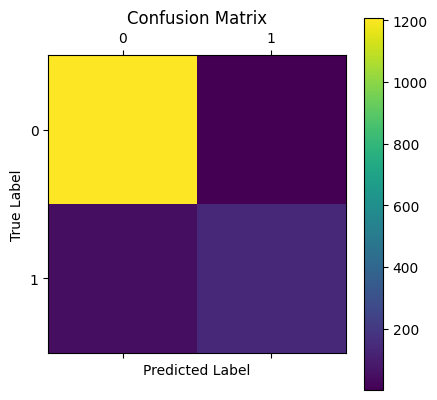

In [12]:
import matplotlib.pyplot as plt

plt.matshow(conf_matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

  akurasi

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9655419956927495


presission dan recall

In [14]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
#

Precision: 0.9928057553956835
Recall: 0.745945945945946


f1-score

In [15]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

F1 Score: 0.8518518518518519


Receiver Operating Characteristic (ROC) adalah kurva yang digunakan untuk mengevaluasi performa model klasifikasi, khususnya dalam menangani dataset yang tidak seimbang. ROC menunjukkan trade-off antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai nilai threshold (ambang batas).

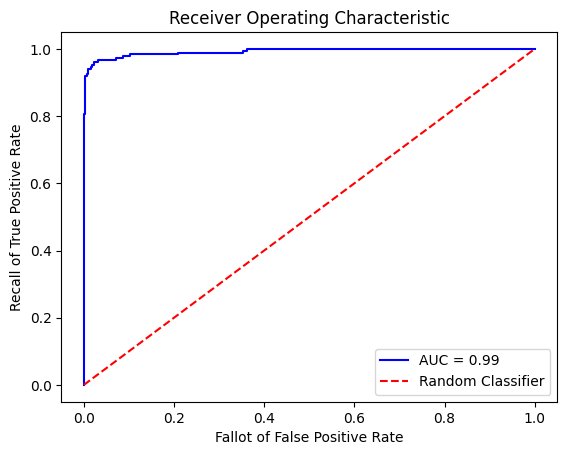

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

prob_estimates = model.predict_proba(x_test_tfidf)

fpr, tpr, thresholds = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b',label=f'AUC = {nilai_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

plt.title('Receiver Operating Characteristic')
plt.xlabel('Fallot of False Positive Rate')
plt.ylabel('Recall of True Positive Rate')
plt.legend()
plt.show()